In [1]:
%%html
<style>
.output_wrapper, .output {
    height:auto !important;
    max-height:1000px;  /* your desired max-height here */
}
.output_scroll {
    box-shadow:none !important;
    webkit-box-shadow:none !important;
}
</style>

#### Import data & packages for cleaning

In [2]:
import pandas as pd
import string
import regex as re
from nltk.stem.lancaster import LancasterStemmer
df = pd.read_csv("Cleaned_Data.csv")

## Pre-processing data
### Use Regex & Python string library to remove numbers, special characters, capitalizations from tweets. 
#### Stemmer applied as well

In [3]:
df["Tweet"]=df.Tweet.apply(lambda x: re.sub("[^a-zA-Z:,@#'\s]+","",x))
df["Tweet"]=df["Tweet"].apply(lambda x: x.lower())
df["Tweet"] = df.Tweet.map(lambda x: re.sub('[%s]' % re.escape(string.punctuation),' ',x))
stemmer = LancasterStemmer()
df["Tweet"] = df["Tweet"].apply(lambda x: stemmer.stem(x))

### Second of 4 groups (Tweets #400_001 to #800K each)

In [4]:
tweets_1600K = df["Tweet"][1_200_001:]
tweets_1600K_list = list(tweets_1600K)

In [5]:
tweets_1600K.head()

1200001    loooves my friends  and as of today loves the ...
1200002                               the hills  last one d 
1200003                          teamviewer is entertaining 
1200004    i intensely miss my bestfriends much love  two...
1200005    watching the hills season finale can t wait fo...
Name: Tweet, dtype: object

### Create stop_word list to remove unnecessary nouns
#### Repetitive nouns or words mistaken as nouns still pose a problem

In [6]:
from sklearn.feature_extraction import text

In [7]:
addl_stop_words = ["ah",
"ahh",
"ahhh",
"ahhhh",
"alot",
"amp",
"aren",
"arent",
"argh",
"ass",
"aw",
"aww",
"awww",
"awwww",
"babe",
"baby",
"bad",
"bc",
"big",
"bit",
"bitch",
"blah",
"boo",
"bout",
"boy",
"boys",
"btw",
"bye",
"cnt",
"cos",
"couldn",
"coz",
"cuz",
"da",
"dam",
"day",
"days",
"dear",
"decent",
"def",
"did",
"didn",
"didnt",
"dnt",
"doesn",
"doesn’t",
"doesnt",
"doin",
"don",
"dont",
"dude",
"feeling",
"fml",
"friday",
"fuck",
"getting",
"girl",
"girls",
"god",
"goin",
"gon",
"gonna",
"good",
"goodbye",
"goodnight",
"goood",
"gosh",
"great",
"gt",
"guess",
"gunna",
"guy",
"guys",
"ha",
"haha",
"hahaha",
"hahahaha",
"hard",
"hav",
"haven",
"havin",
"hell",
"hey",
"hi",
"hope",
"hour",
"hours",
"hrs",
"http",
"huge",
"idk",
"im",
"isn",
"isnt",
"jk",
"jus",
"just",
"kno",
"lady",
"left",
"lil",
"link",
"little",
"ll",
"lmao",
"lol",
"long",
"lot",
"lots",
"love",
"lt",
"luv",
"ma",
"making",
"man",
"monday",
"morning",
"moro",
"morrow",
"mr",
"na",
"nd",
"new",
"nice",
"night",
"nights",
"nite",
"noes",
"nope",
"oh",
"ohh",
"ok",
"okay",
"omg",
"omgosh",
"ones",
"ouch",
"ouch",
"ouch",
"ow",
"ow",
"ow",
"past",
"people",
"plz",
"pm",
"poor",
"poor",
"rd",
"ready",
"ready",
"real",
"real",
"right",
"rip",
"rip",
"saturday",
"shit",
"sleepy",
"sleepy",
"so",
"soo",
"sooo",
"soooo",
"sooooo",
"soooooo",
"sorry",
"st",
"st",
"stay",
"stuff",
"stupid",
"sucks",
"sunday",
"super",
"ta",
"terrible",
"th",
"th",
"thanks",
"thats",
"thing",
"things",
"tho",
"thursday",
"til",
"till",
"time",
"times",
"today",
"tommorow",
"tomorrow",
"tomorrow",
"tomorrow",
"tomorrow",
"tonight",
"tuesday",
"ugh",
"ughh",
"uh",
"ur",
"ve",
"vs",
"vs",
"wait",
"wan",
"wanna",
"want",
"wasn",
"way",
"wednesday",
"wee",
"week",
"weekend",
"weeks",
"wish",
"wit",
"wit",
"wont",
"wouldn",
"wouldnt",
"wow",
"xd",
"xoxo",
"xoxo",
"xx",
"ya",
"ya",
"yay",
"yea",
"yeah",
"year",
"years",
"yes",
"yesterday",
"yo",
"yr"]

In [8]:
stop_word_list = text.ENGLISH_STOP_WORDS.union(addl_stop_words)

### Reducing tweets to nouns for topic modelling
#### Removing filler words as much as possible, testing TextBlob's noun tags vs noun phrases

In [9]:
import nltk
nltk.download('brown')
import textblob
from textblob import TextBlob

[nltk_data] Downloading package brown to
[nltk_data]     /Users/francescaepiccorelli/nltk_data...
[nltk_data]   Package brown is already up-to-date!


In [10]:
acceptable_types = ["NN","NNS","NNP","NNPS"]

In [11]:
def nouns_only(string_list):
    new_tweet_list = []
    for string in string_list:
        new_string_list = []
        blob_list = TextBlob(string)
        for blob in blob_list.tags:
            if blob[1] in acceptable_types:
                new_string_list.append(blob[0])
        new_string = " ".join(new_string_list)
        new_tweet_list.append(new_string)
    return new_tweet_list

In [12]:
please_work = nouns_only(["Victoria is going to Washington, DC to see George Washington's monument.",
             "Jane fell down the well and hit water"])
print(please_work)

['Victoria Washington DC George Washington monument', 'Jane well hit water']


In [13]:
def blob_nouns_only(string_list):
    new_tweet_list = []
    for string in string_list:
        new_string_list = []
        blob = TextBlob(string)
        noun_list = blob.noun_phrases
        for noun in noun_list:
            new_tweet_list.append(noun)
    return new_tweet_list

In [14]:
nouns_1600K_list = nouns_only(tweets_1600K_list)

In [15]:
phrases_1600K_list = blob_nouns_only(tweets_1600K_list)

In [16]:
nouns_1600K_list[:5]

['loooves friends today chillness sundays',
 'hills d',
 'teamviewer',
 'i bestfriends days',
 'hills season finale wait world premier moon clip']

In [17]:
phrases_1600K_list[:5]

['hills season finale',
 'world premier',
 'new moon clip',
 'mtv music awards',
 'kempequine thanks']

## NMF Topic Printer for EDA

In [18]:
import numpy as np

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import NMF

In [20]:
def topic_printer(cv,topic_count,solver_type,tweet_list):
    X = cv.fit_transform(tweet_list)
    df = pd.DataFrame(X.toarray(),columns=cv.get_feature_names())
    words = np.array(cv.get_feature_names())
    nmf = NMF(n_components=topic_count,solver=solver_type)
    W = nmf.fit_transform(X)
    H = nmf.components_
    for i, topic in enumerate(H):
        print("Topic {}: {}".format(i + 1, ",".join([str(x) for x in words[topic.argsort()[-10:]]])))
    return

#### Model A: Words must appear in .1% of all 400_000 documents

In [21]:
cv_A = CountVectorizer(stop_words = stop_word_list, min_df = .001)
topic_count_A = 20
solver = 'mu'

In [22]:
#Only using TextBlob noun_phrases, not NLTK
#topic_printer(cv_A,topic_count_A,solver,nouns_800K_list)

#### Same code but with TextBlob Noun Phases

In [23]:
topic_printer(cv_A,topic_count_A,solver,nouns_1600K_list)

/Users/francescaepiccorelli/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Topic 1: dinner,money,office,sun,coffee,bed,break,lunch,job,work
Topic 2: followers,background,updates,tweets,page,phone,hello,facebook,account,twitter
Topic 3: sleep,place,lunch,trip,mom,family,bed,dinner,sweet,home
Topic 4: luck,place,pics,sun,trip,kids,glad,family,sounds,fun
Topic 5: welcome,help,congrats,tweets,hello,wwwtweeterfollowcom,wwwtweeteraddercom,vip,train,followers
Topic 6: glad,luck,hugs,tweets,support,blog,words,ff,kind,thank
Topic 7: hangover,dinner,mileycyrus,twilight,book,trailer,moon,mtv,awards,movie
Topic 8: college,finals,test,exam,exams,graduation,bed,class,kids,school
Topic 9: glad,moment,family,book,job,coffee,story,sun,rest,life
Topic 10: month,brother,family,bday,cake,june,dad,dinner,mom,birthday
Topic 11: sun,beach,coffee,facebook,lunch,food,bed,dinner,family,friends
Topic 12: jonasbrothers,radio,songs,jonas,miley,head,album,mileycyrus,video,song
Topic 13: hair,beach,break,rain,june,vacation,sun,weather,job,summer
Topic 14: coffee,tour,cup,job,welcome,person

#### Model B: no min_df

In [24]:
cv_B = CountVectorizer(stop_words = stop_word_list)
topic_count_B = 20
solver = 'mu'

In [25]:
topic_printer(cv_B,topic_count_B,solver,nouns_1600K_list)

Topic 1: gym,dinner,money,office,sun,coffee,break,lunch,job,work
Topic 2: followers,background,updates,tweets,page,phone,hello,facebook,account,twitter
Topic 3: sleep,car,place,lunch,trip,mom,family,dinner,sweet,home
Topic 4: place,pics,tons,sun,trip,kids,glad,family,sounds,fun
Topic 5: station,help,congrats,tweets,hello,wwwtweeterfollowcom,wwwtweeteraddercom,vip,train,followers
Topic 6: hugs,tweets,support,blog,words,followfriday,ff,goodness,kind,thank
Topic 7: hangover,dinner,mileycyrus,twilight,book,trailer,moon,mtv,awards,movie
Topic 8: end,college,finals,test,exam,exams,graduation,class,kids,school
Topic 9: glad,moment,family,book,job,coffee,story,sun,rest,life
Topic 10: brother,family,wishes,bday,cake,june,dad,dinner,mom,birthday
Topic 11: pics,sun,beach,coffee,facebook,lunch,food,dinner,family,friends
Topic 12: favorite,radio,songs,jonas,miley,head,album,mileycyrus,video,song
Topic 13: hair,beach,break,rain,june,vacation,sun,job,weather,summer
Topic 14: tour,cup,job,welcome,pers

#### Model C: max_df. can't appear in more than 20% of documents

In [26]:
cv_C = CountVectorizer(stop_words = stop_word_list,max_df=.20)
topic_count_C = 20
solver = 'mu'

In [27]:
topic_printer(cv_C,topic_count_C,solver,nouns_1600K_list)

Topic 1: gym,dinner,money,office,sun,coffee,break,lunch,job,work
Topic 2: followers,background,updates,tweets,phone,page,hello,facebook,account,twitter
Topic 3: sleep,car,place,lunch,trip,mom,family,dinner,sweet,home
Topic 4: place,pics,tons,sun,kids,trip,glad,family,sounds,fun
Topic 5: station,help,congrats,tweets,hello,wwwtweeterfollowcom,wwwtweeteraddercom,vip,train,followers
Topic 6: hugs,tweets,support,blog,words,followfriday,ff,goodness,kind,thank
Topic 7: hangover,dinner,mileycyrus,twilight,book,trailer,moon,mtv,awards,movie
Topic 8: end,college,finals,test,exam,exams,graduation,class,kids,school
Topic 9: glad,moment,family,book,job,coffee,story,sun,rest,life
Topic 10: brother,family,wishes,bday,cake,june,dad,dinner,mom,birthday
Topic 11: sun,pics,beach,coffee,facebook,lunch,food,dinner,family,friends
Topic 12: favorite,radio,songs,jonas,miley,head,album,mileycyrus,video,song
Topic 13: hair,beach,break,rain,june,vacation,sun,job,weather,summer
Topic 14: tour,job,cup,welcome,pers

#### Model D: max_df. can't appear in more than 10% of documents

In [28]:
cv_D = CountVectorizer(stop_words = stop_word_list,max_df=.10)
topic_count_D= 20
solver = 'mu'

In [29]:
topic_printer(cv_D,topic_count_D,solver,nouns_1600K_list)

Topic 1: gym,dinner,money,office,sun,coffee,break,lunch,job,work
Topic 2: followers,background,updates,tweets,phone,page,hello,facebook,account,twitter
Topic 3: car,bed,place,lunch,trip,mom,family,dinner,sweet,home
Topic 4: place,pics,tons,sun,kids,trip,glad,family,sounds,fun
Topic 5: station,help,congrats,tweets,hello,wwwtweeterfollowcom,wwwtweeteraddercom,vip,train,followers
Topic 6: hugs,tweets,support,blog,words,followfriday,ff,goodness,kind,thank
Topic 7: hangover,dinner,mileycyrus,twilight,book,trailer,moon,mtv,awards,movie
Topic 8: end,college,finals,test,exam,exams,graduation,class,kids,school
Topic 9: joy,moment,family,book,job,coffee,story,sun,rest,life
Topic 10: brother,family,wishes,cake,bday,june,dad,dinner,mom,birthday
Topic 11: pics,sun,beach,coffee,facebook,lunch,food,dinner,family,friends
Topic 12: favorite,radio,songs,jonas,miley,head,album,mileycyrus,video,song
Topic 13: hair,beach,break,rain,june,vacation,sun,job,weather,summer
Topic 14: tour,cup,job,welcome,person,

In [30]:
#### Model E: Blob Phrase Analysis

In [31]:
cv_E = CountVectorizer(stop_words = stop_word_list)
topic_count_E= 20
solver = 'mu'

In [32]:
topic_printer(cv_E,topic_count_E,solver,phrases_1600K_list)

Topic 1: jonas,mom,wishes,belated,june,tetris,anniversary,bday,birthday,happy
Topic 2: peace,diminuiriam,jurava,aumentaram,meus,mas,que,eu,followers,sebday
Topic 3: profile,universe,facebook,background,page,hello,friends,account,world,twitter
Topic 4: pic,video,look,news,freakin,game,congrats,job,pretty,awesome
Topic 5: life,damn,paper,team,gym,finish,yard,experience,bed,work
Topic 6: place,pics,friends,evening,hella,crazy,family,game,pretty,fun
Topic 7: pics,rest,money,quoti,followers,bed,food,tom,coffee,need
Topic 8: moon,award,twilight,teen,favorite,choice,funny,mtv,awards,movie
Topic 9: favorite,hello,life,followers,previous,bed,deck,friends,dreams,tweet
Topic 10: site,congrats,weather,funny,kids,look,pic,check,pretty,cool
Topic 11: potato,tweets,dream,tea,world,bed,pretty,home,dreams,sweet
Topic 12: boyfriend,food,congrats,weather,dinner,person,friends,pretty,job,amazing
Topic 13: ddlovato,davidarchie,hehe,tomfelton,hun,world,busy,miley,life,luck
Topic 14: cream,ice,check,grad,bir

In [33]:
cv_F = CountVectorizer(stop_words = stop_word_list)
topic_count_F= 10
solver = 'mu'
topic_printer(cv_F,topic_count_F,solver,phrases_1600K_list)

Topic 1: mom,wishes,belated,june,tetris,anniversary,party,bday,birthday,happy
Topic 2: peace,jurava,aumentaram,diminuiriam,meus,mas,que,eu,followers,sebday
Topic 3: profile,universe,facebook,background,page,hello,friends,account,world,twitter
Topic 4: video,friends,game,music,congrats,job,song,sounds,pretty,awesome
Topic 5: summer,finish,yard,home,experience,bed,sleep,amazing,school,work
Topic 6: hella,crazy,friends,family,summer,party,game,pretty,sounds,fun
Topic 7: money,luck,quoti,followers,food,bed,tom,coffee,sleep,need
Topic 8: teen,favorite,choice,music,amazing,funny,cute,mtv,awards,movie
Topic 9: followers,sleep,previous,deck,sweet,school,bed,friends,dreams,tweet
Topic 10: sounds,sleep,song,luck,dreams,amazing,pretty,home,sweet,cool


In [34]:
cv_G = CountVectorizer(stop_words = stop_word_list)
topic_count_G= 5
solver = 'mu'
topic_printer(cv_G,topic_count_G,solver,phrases_1600K_list)

Topic 1: mom,wishes,belated,june,tetris,anniversary,party,bday,birthday,happy
Topic 2: peace,jurava,diminuiriam,aumentaram,meus,mas,que,eu,followers,sebday
Topic 3: facebook,background,tweet,need,page,hello,friends,account,world,twitter
Topic 4: friends,game,congrats,music,job,song,movie,sounds,pretty,awesome
Topic 5: summer,home,bed,amazing,sleep,school,sounds,need,fun,work


In [35]:
cv_H = CountVectorizer(stop_words = stop_word_list)
topic_count_H= 40
solver = 'mu'
topic_printer(cv_H,topic_count_H,solver,phrases_1600K_list)

Topic 1: belated,hump,joy,jonas,tetris,june,anniversary,birthday,bday,happy
Topic 2: peace,jurava,diminuiriam,aumentaram,meus,mas,que,eu,followers,sebday
Topic 3: pic,followers,app,profile,universe,facebook,background,page,account,twitter
Topic 4: group,dinner,friend,congratulations,pic,news,freakin,congrats,job,awesome
Topic 5: office,play,damn,paper,team,gym,finish,yard,experience,work
Topic 6: meeting,fact,place,trip,pics,evening,hella,crazy,family,fun
Topic 7: desperate,pics,rest,money,quoti,followers,food,tom,coffee,need
Topic 8: tony,moon,award,twilight,teen,favorite,choice,mtv,awards,movie
Topic 9: pics,late,danny,peeps,favorite,followers,previous,deck,dreams,tweet
Topic 10: huh,place,breeze,idea,site,congrats,weather,kids,pic,cool
Topic 11: sixteen,congrats,pic,potato,tweets,dream,friend,tea,dreams,sweet
Topic 12: voice,food,book,boyfriend,congrats,weather,dinner,person,job,amazing
Topic 13: brother,matt,tetris,dad,belated,mom,dinner,cake,wishes,birthday
Topic 14: xxx,mileycyru

In [36]:
cv_I = CountVectorizer(stop_words = stop_word_list)
topic_count_I= 60
solver = 'mu'
topic_printer(cv_I,topic_count_I,solver,phrases_1600K_list)

Topic 1: thoughts,dance,belated,hump,joy,tetris,anniversary,birthday,bday,happy
Topic 2: peace,jurava,aumentaram,diminuiriam,meus,mas,que,eu,followers,sebday
Topic 3: updates,followers,profile,app,universe,facebook,background,page,account,twitter
Topic 4: picture,person,idea,shes,youre,group,congratulations,news,freakin,awesome
Topic 5: busy,play,damn,paper,team,gym,finish,yard,experience,work
Topic 6: place,meeting,fact,trip,pics,evening,hella,crazy,family,fun
Topic 7: ppl,advice,desperate,pics,rest,money,quoti,followers,tom,need
Topic 8: funniest,date,scary,star,montana,hannah,marathon,awards,mtv,movie
Topic 9: pics,twit,late,danny,peeps,followers,previous,deck,dreams,tweet
Topic 10: thx,kid,huh,place,breeze,idea,site,weather,kids,cool
Topic 11: kisses,fries,quot,sixteen,potato,tweets,dream,tea,dreams,sweet
Topic 12: trip,pics,taylor,band,voice,book,boyfriend,weather,person,amazing
Topic 13: brother,matt,dinner,tetris,dad,belated,mom,cake,wishes,birthday
Topic 14: gd,miley,exam,xxx,d

In [37]:
cv_J = CountVectorizer(stop_words = stop_word_list)
topic_count_J= 100
solver = 'mu'
topic_printer(cv_J,topic_count_J,solver,phrases_1600K_list)

Topic 1: face,belated,dance,thoughts,hump,joy,tetris,anniversary,birthday,happy
Topic 2: kisses,peace,meus,jurava,aumentaram,diminuiriam,mas,que,eu,sebday
Topic 3: client,updates,profile,app,universe,facebook,background,page,account,twitter
Topic 4: word,photos,pics,pictures,shes,congratulations,youre,group,freakin,awesome
Topic 5: office,design,play,paper,team,gym,finish,yard,experience,work
Topic 6: huh,twas,pictures,xxx,meeting,fact,pics,evening,hella,fun
Topic 7: imma,gym,ppl,advice,desperate,pics,rest,money,quoti,need
Topic 8: awards,date,funniest,scary,star,montana,hannah,marathon,mtv,movie
Topic 9: late,pics,joeymcintyre,twit,danny,peeps,previous,deck,dreams,tweet
Topic 10: eh,chick,shirt,peeps,kid,huh,breeze,site,kids,cool
Topic 11: chicken,tweeps,kisses,fries,sixteen,tea,potato,dream,dreams,sweet
Topic 12: person,band,woman,actress,pics,singer,taylor,voice,boyfriend,amazing
Topic 13: project,early,brother,matt,dad,tetris,belated,cake,wishes,birthday
Topic 14: david,gud,mitchel

In [38]:
#### same but with regular noun extractions:

In [39]:
topic_printer(cv_J,topic_count_J,solver,nouns_1600K_list)

Topic 1: play,holiday,experience,home,vacation,boss,gym,office,break,work
Topic 2: talk,myspace,fb,profile,app,page,updates,background,account,twitter
Topic 3: parents,page,ride,office,drive,bus,chillin,town,sweet,home
Topic 4: sister,ton,shoot,lake,sounds,looks,dance,loads,tons,fun
Topic 5: ticket,trains,airport,tickets,station,wwwtweeterfollowcom,wwwtweeteraddercom,followers,vip,train
Topic 6: recommendation,words,mention,follow,hugs,support,followfriday,ff,goodness,thank
Topic 7: date,terminator,trailer,marathon,star,watch,awards,hannah,hangover,movie
Topic 8: math,homework,classes,college,finals,test,exam,exams,graduation,school
Topic 9: college,race,months,change,power,relay,experience,moment,joy,life
Topic 10: month,petewentz,crc,gift,son,tetris,bday,cake,wishes,birthday
Topic 11: wine,list,college,pool,park,share,evening,beer,fb,friends
Topic 12: favourite,awesome,miley,itunes,fav,theme,lyrics,radio,favorite,song
Topic 13: holiday,ball,start,jam,camp,classes,pool,break,vacation,

## Forcing Topics with CorEx
### Anchors selected from choice NMF Topics

In [45]:
words = list(np.asarray(cv_J.get_feature_names()))

In [46]:
data_vectorized_J = cv_J.fit_transform(phrases_1600K_list)


In [47]:
len(words)

214201

In [48]:
data_vectorized_J.shape[1]

214201

In [49]:
from corextopic import corextopic as ct
topic_model = ct.Corex(n_hidden=13, words=words)
topic_model.fit(data_vectorized_J, words=words)
topics = topic_model.get_topics()

topic_model.fit(data_vectorized_J, words=words,
anchors=[['insomnia', 'sleep','tired'],
         ['twitter','facebook','update','app'],
         ['school','graduation'],
         ['air','plane','airplane','france','flight'],
         ['miley','cyrus','mileycyrus','hannah','montana'],
         ['mtv','music','award','awards'],
         ['final','season','finale'],
         ['sports','baseball','football','hockey','season'],
         ['wisdom','tooth','removal','pain','killers','painkillers'],
         ['car','accident','insurance','crash'],
         ['slow','internet','explorer','hate'],
         ['star','wars','trek'],
         ['sims','video','game','warcraft','character']],
anchor_strength=20)

In [ ]:
#data_vectorized_J #first argument in topic_mdoel.fit()

### Print top 10 words for each topic

In [50]:
topics = topic_model.get_topics()
i=0
for topic in topics:
    print("Topic # ",i)
    i+=1
    for tuple in topic:
        print(str(tuple[0]))
#tries to break it apart so only the words and not numbers would print
#for n,topic in enumerate(topics):
#    topic_words = zip(*topic)
#    print('{}: '.format(n) + ','.join(str(topic_words)))

Topic #  0
sleep
insomnia
beauty
deprivation
dreams
sweet
zzzzzz
nowor
ima
pattern
Topic #  1
twitter
facebook
update
app
account
status
page
world
universe
background
Topic #  2
school
graduation
high
old
summer
party
elementary
graduate
primary
middle
Topic #  3
air
flight
plane
france
airplane
cest
timestamp
jun
mon
safe
Topic #  4
mileycyrus
miley
hannah
montana
cyrus
twitpiccomshtr
twitpiccomdvj
twitpiccomfwg
twitpiccomfdyd
twitpiccomfvzh
Topic #  5
music
awards
mtv
award
movie
teen
choice
tony
videos
cmt
Topic #  6
season
final
finale
hills
destination
fantasy
exam
ch
hurricane
premiere
Topic #  7
season
baseball
sports
football
hockey
blood
league
sadekhm
pra
channels
Topic #  8
pain
wisdom
ice
cream
tooth
chocolate
yup
yummy
chicken
killers
Topic #  9
car
crash
insurance
accident
sa
ko
ng
di
ako
lang
Topic #  10
internet
slow
explorer
google
hahah
santa
sho
fo
rofl
wave
Topic #  11
star
trek
wars
bride
mafia
quot
gold
whale
tmb
biffy
Topic #  12
game
video
sims
character
warcra

In [51]:
### how many tweets fit in each document?

### Viewing distribution of topics for applicable tweets 

In [52]:
topic_categories = pd.DataFrame(topic_model.predict(data_vectorized_J), columns=['topic'+str(i) for i in range(13)])
topic_categories.head(3)

,topic0,topic1,topic2,topic3,topic4,topic5,topic6,topic7,topic8,topic9,topic10,topic11,topic12
0,False,False,False,False,False,False,True,True,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False


In [53]:
import matplotlib.pyplot as plt

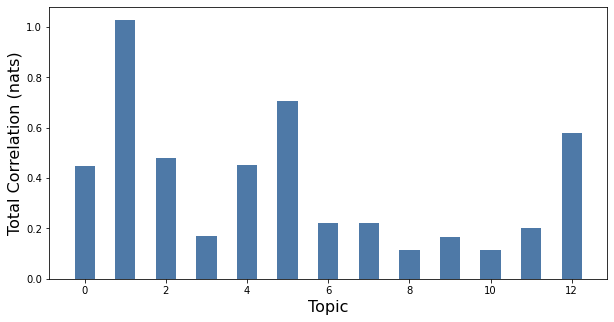

In [54]:
plt.figure(figsize=(10,5))
plt.bar(range(topic_model.tcs.shape[0]), topic_model.tcs, color='#4e79a7', width=0.5)
plt.xlabel('Topic', fontsize=16)
plt.ylabel('Total Correlation (nats)', fontsize=16);

In [ ]:
### PICKLE FOR MULTI BAR GRAPH

In [71]:
import pickle

In [161]:
list_1600K_topic_dist = list(topic_model.tcs*1000)

In [162]:
with open('list_1600K_topic_dist.pickle','wb') as to_write:
    pickle.dump(list_1600K_topic_dist, to_write)

In [74]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [137]:
mask1 = np.array(Image.open("paint_1a.png"))
mask2 = np.array(Image.open("paint_2a.png"))
mask3 = np.array(Image.open("paint_3a.png"))
mask4 = np.array(Image.open("paint_4a.png"))
mask_bed = np.array(Image.open("little-bed-clip-art-314675.png"))
mask_circle = np.array(Image.open("big_circle.png"))
mask_tooth = np.array(Image.open("tooth.png"))

In [152]:
font_1 = "/Downloads/NLP_Unsupervised/Pacifico.ttf"

In [158]:
def top_tweets_word_cloud(topic_number,n_docs,new_mask=None):
    top_tweets = topic_model.get_top_docs(topic=topic_number,n_docs=n_docs)
    top_tweet_list = []
    for each_tuple in top_tweets:
         top_tweet_list.append(phrases_1600K_list[each_tuple[0]])
    top_tweet_string = " ".join(top_tweet_list)
    wordcloud_topic = WordCloud(collocations=False,
                                mask=new_mask,
                                background_color="white",
                                contour_width=1,
                                contour_color="black").generate(top_tweet_string)
    plt.figure(figsize=(10,6))
    plt.imshow(wordcloud_topic, interpolation='bilinear')
    plt.axis("off")
    plt.show()

NOTE: 'docs' not provided to CorEx. Returning top docs as lists of row indices


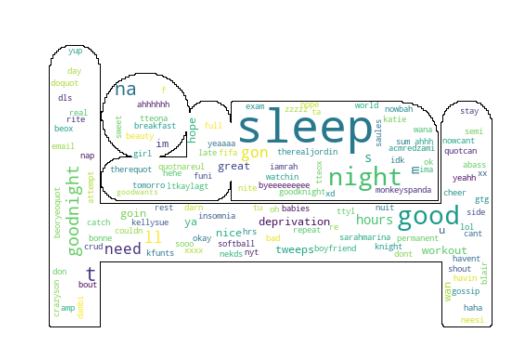

In [160]:
top_tweets_word_cloud(0,100top_tweets_word_cloud()

NOTE: 'docs' not provided to CorEx. Returning top docs as lists of row indices


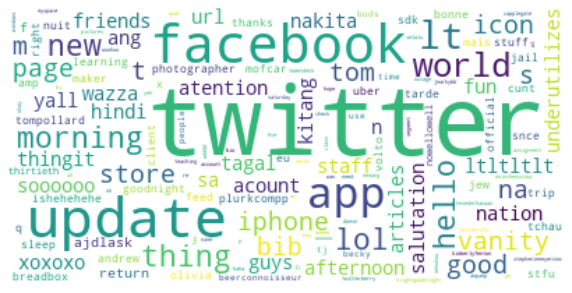

In [157]:
top_tweets_word_cloud(1,100)

NOTE: 'docs' not provided to CorEx. Returning top docs as lists of row indices


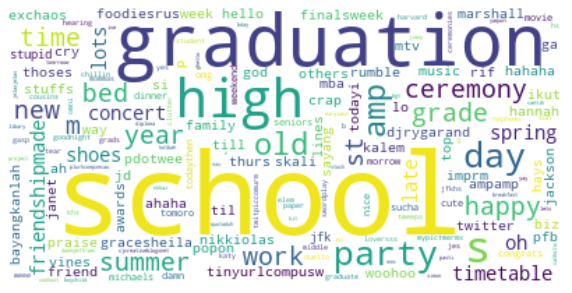

In [125]:
top_tweets_word_cloud(2,100)

NOTE: 'docs' not provided to CorEx. Returning top docs as lists of row indices


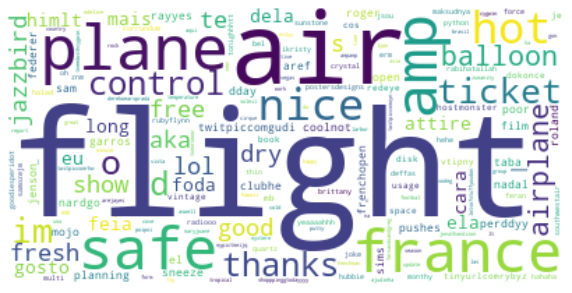

In [126]:
top_tweets_word_cloud(3,100)

NOTE: 'docs' not provided to CorEx. Returning top docs as lists of row indices


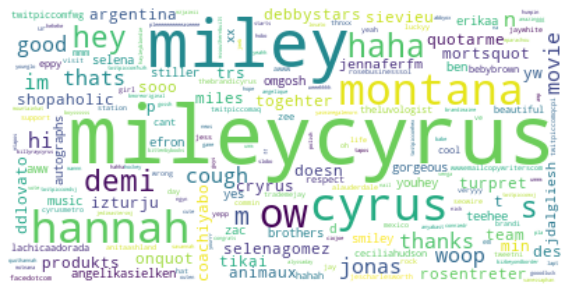

In [127]:
top_tweets_word_cloud(4,100)

NOTE: 'docs' not provided to CorEx. Returning top docs as lists of row indices


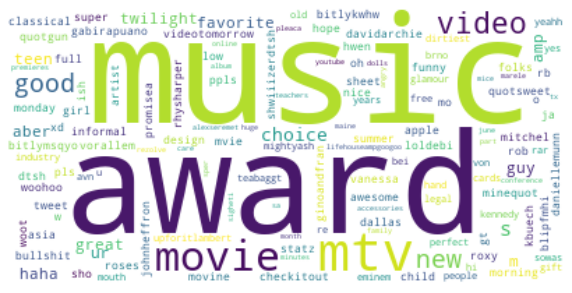

In [128]:
top_tweets_word_cloud(5,100)

NOTE: 'docs' not provided to CorEx. Returning top docs as lists of row indices


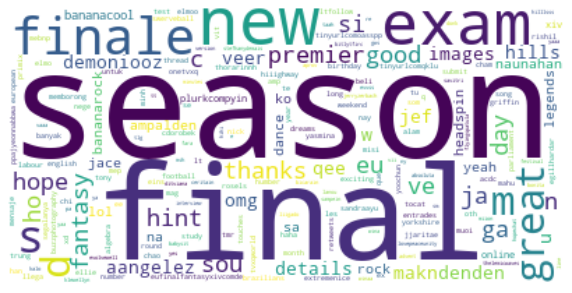

In [129]:
top_tweets_word_cloud(6,100)

NOTE: 'docs' not provided to CorEx. Returning top docs as lists of row indices


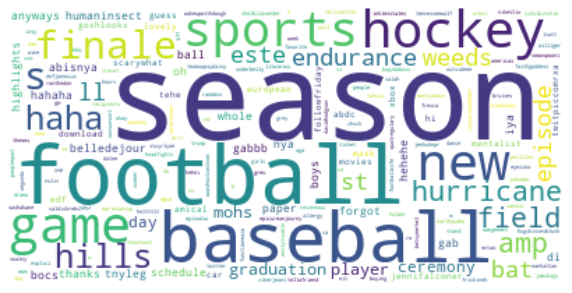

In [130]:
top_tweets_word_cloud(7,100)

NOTE: 'docs' not provided to CorEx. Returning top docs as lists of row indices


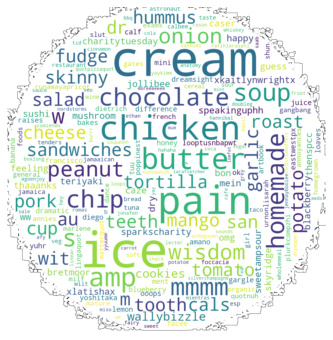

In [146]:
top_tweets_word_cloud(8,100,mask_circle)

NOTE: 'docs' not provided to CorEx. Returning top docs as lists of row indices


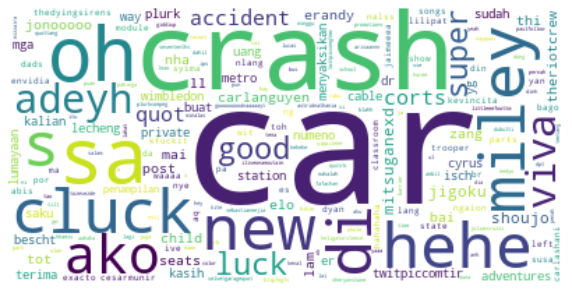

In [132]:
top_tweets_word_cloud(9,50)

NOTE: 'docs' not provided to CorEx. Returning top docs as lists of row indices


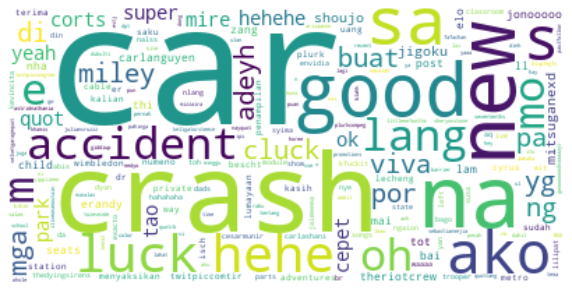

In [133]:
top_tweets_word_cloud(9,100)

NOTE: 'docs' not provided to CorEx. Returning top docs as lists of row indices


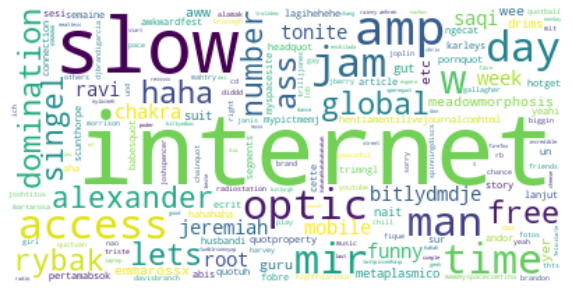

In [134]:
top_tweets_word_cloud(10,50)

NOTE: 'docs' not provided to CorEx. Returning top docs as lists of row indices


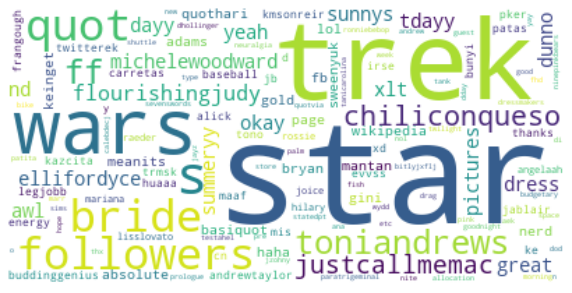

In [135]:
top_tweets_word_cloud(11,50)

NOTE: 'docs' not provided to CorEx. Returning top docs as lists of row indices


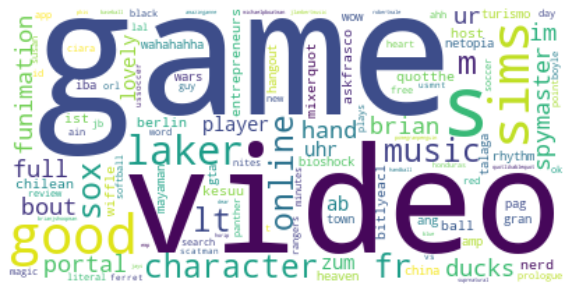

In [136]:
top_tweets_word_cloud(12,50)